In [1]:
import pandas as pd
import datetime
import numpy as np
import math

import plotly.offline as py 
import plotly.graph_objs as go 

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from numpy.polynomial.polynomial import polyfit

import seaborn as sns

from sklearn import preprocessing

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [77]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score


from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [2]:
file_url="Telco.csv"

df=pd.read_csv(file_url)

In [3]:
df.sample(10)

,customerID,Region,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6340,3323-CPBWR,Germany,Male,0,No,No,23,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,No,Month-to-month,Yes,Credit card (automatic),96.90,2085.45,No
1644,3331-HQDTW,Germany,Female,0,No,No,34,Yes,Yes,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Mailed check,109.80,3587.25,Yes
4481,8644-XYTSV,Germany,Male,0,Yes,No,42,No,No phone service,DSL,...,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),40.15,1626.05,No
3472,4840-ORQXB,Germany,Female,1,No,No,56,Yes,Yes,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,No,Electronic check,104.75,5841.35,No
456,5149-CUZUJ,Germany,Male,0,Yes,Yes,28,Yes,No,Fiber optic,...,Yes,Yes,Yes,No,One year,No,Bank transfer (automatic),92.90,2768.35,No
1584,9906-NHHVC,Germany,Female,1,No,No,65,No,No phone service,DSL,...,Yes,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),53.50,3517.9,No
6931,2371-KFUOG,Germany,Male,0,No,No,58,Yes,No,Fiber optic,...,No,No,Yes,Yes,One year,No,Bank transfer (automatic),99.15,5720.95,No
5169,7105-BENQF,Germany,Male,0,No,Yes,15,Yes,No,DSL,...,Yes,No,No,Yes,One year,No,Mailed check,64.85,950.75,No
607,8672-OAUPW,Germany,Male,0,No,Yes,51,Yes,No,DSL,...,No,Yes,No,No,One year,No,Credit card (automatic),47.85,2356.75,No
3241,3148-BLQJT,Germany,Male,0,No,No,1,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.10,20.1,Yes


In [262]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [279]:
serviceDict={}
serviceDict['gender']=[]
serviceDict['SeniorCitizen']=[]
serviceDict['Partner']=[]
serviceDict['Dependents']=[]
serviceDict['Tenure']=[]
serviceDict['PhoneService']=[]
serviceDict['MultipleLines']=[]
serviceDict['InternetService']=[]
serviceDict['OnlineSecurity']=[]
serviceDict['OnlineBackup']=[]
serviceDict['DeviceProtection']=[]
serviceDict['TechSupport']=[]
serviceDict['StreamingTV']=[]
serviceDict['StreamingMovies']=[]
serviceDict['Contact']=[]
serviceDict['PaperlessBilling']=[]
serviceDict['PaymentMethodBank']=[]
serviceDict['PaymentMethodCredit']=[]
serviceDict['PaymentMethodCheck']=[]
serviceDict['PaymentMethodMail']=[]
serviceDict['MonthlyCharges']=[]
serviceDict['TotalCharges']=[]

for index,row in df.iterrows():
    
    gender=row['gender']
    senior=row['SeniorCitizen']
    partner=row['Partner']
    dependent=row['Dependents']
    tenure=row['tenure']
    phone_service=row['PhoneService']
    multiple_line=row['MultipleLines']
    internet_service=row['InternetService']
    online_security=row['OnlineSecurity']
    online_backup=row['OnlineBackup']
    device_protection=row['DeviceProtection']
    tech_support=row['TechSupport']
    streamingTV=row['StreamingTV']
    streamingMovies=row['StreamingMovies']
    contact=row['Contract']
    paperless=row['PaperlessBilling']
    paymentMethod=row['PaymentMethod']
    charge=row["MonthlyCharges"]
    total=row['TotalCharges']
    churn=row["Churn"]

    
    if gender=='Male':
        serviceDict['gender'].append(1)
    else:
        serviceDict['gender'].append(0)
        
    serviceDict['SeniorCitizen'].append(senior)
    
    if partner=='Yes':
        serviceDict['Partner'].append(1)
    else:
        serviceDict['Partner'].append(0)
        
    if dependent=='Yes':
        serviceDict['Dependents'].append(1)
    else:
        serviceDict['Dependents'].append(0)
        
    serviceDict['Tenure'].append(tenure)
    
    if phone_service=="Yes":
        serviceDict['PhoneService'].append(1)
    else:
        serviceDict['PhoneService'].append(0)
        
    if multiple_line=="Yes":
        serviceDict['MultipleLines'].append(1)
    else:
        serviceDict['MultipleLines'].append(0)
        
    if internet_service!="No":
        serviceDict['InternetService'].append(1)
    else:
        serviceDict['InternetService'].append(0)
        
    if online_security=="Yes":
        serviceDict['OnlineSecurity'].append(1)
    else:
        serviceDict['OnlineSecurity'].append(0)
        
    if online_backup=="Yes":
        serviceDict['OnlineBackup'].append(1)
    else:
        serviceDict['OnlineBackup'].append(0)
        
    if device_protection=="Yes":
        serviceDict['DeviceProtection'].append(1)
    else:
        serviceDict['DeviceProtection'].append(0)
        
    if tech_support=="Yes":
        serviceDict['TechSupport'].append(1)
    else:
        serviceDict['TechSupport'].append(0)
        
    if streamingTV=="Yes":
        serviceDict['StreamingTV'].append(1)
    else:
        serviceDict['StreamingTV'].append(0)
        
    if streamingMovies=="Yes":
        serviceDict['StreamingMovies'].append(1)
    else:
        serviceDict['StreamingMovies'].append(0)
       
    if contact=='One year':
        serviceDict['Contact'].append(1)
    elif contact=='Two year':
        serviceDict['Contact'].append(2)
    else:
        serviceDict['Contact'].append(1/12)
        
    if paperless=='Yes':
        serviceDict['PaperlessBilling'].append(1)
    else:
        serviceDict['PaperlessBilling'].append(0)
        
    if paymentMethod=="Bank transfer (automatic)":
        serviceDict['PaymentMethodBank'].append(1)
    else:
        serviceDict['PaymentMethodBank'].append(0)
        
    if paymentMethod=="Credit card (automatic)":
        serviceDict['PaymentMethodCredit'].append(1)
    else:
        serviceDict['PaymentMethodCredit'].append(0)
        
    if paymentMethod=="Electronic check":
        serviceDict['PaymentMethodCheck'].append(1)
    else:
        serviceDict['PaymentMethodCheck'].append(0)
        
    if paymentMethod=="Mailed check":
        serviceDict['PaymentMethodMail'].append(1)
    else:
        serviceDict['PaymentMethodMail'].append(0)
    
    serviceDict['MonthlyCharges'].append(charge)
    
    serviceDict['TotalCharges'].append(total)

In [280]:
df_service = pd.DataFrame(serviceDict) 
df_service.sample(5)

,gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contact,PaperlessBilling,PaymentMethodBank,PaymentMethodCredit,PaymentMethodCheck,PaymentMethodMail,MonthlyCharges,TotalCharges
6896,0,0,0,0,1,1,0,1,0,0,...,0,0,0.083333,0,0,0,0,1,43.95,43.95
3774,1,1,1,1,52,1,1,1,0,1,...,1,1,1.000000,1,0,0,1,0,80.85,4079.55
4409,1,1,1,0,71,0,0,1,1,1,...,0,0,2.000000,0,0,1,0,0,46.35,3353.4
4546,0,0,1,1,12,1,1,1,0,1,...,0,0,0.083333,1,0,0,1,0,84.50,916.9
736,0,0,0,0,30,1,1,1,0,1,...,1,1,1.000000,0,0,1,0,0,110.45,3327.05


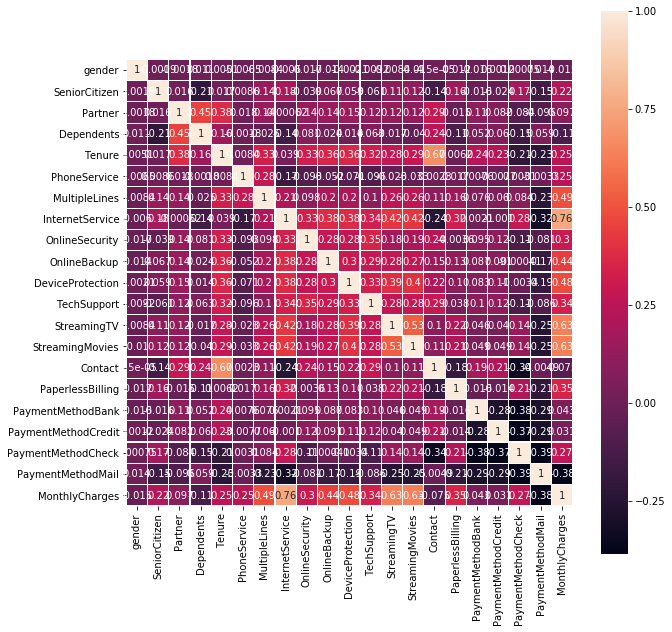

In [282]:
plt.figure(figsize=(10,10))
sns.heatmap(df_service.corr(),linewidths=0.1,vmax=1.0, 
            square=True,  linecolor='white', annot=True)
plt.show()

In [306]:
bins = [0,12,24,36,48,60,72,84]
df['tenure_bin'] = pd.cut(df['tenure'],bins,labels=[1,2,3,4,5,6,7])

In [307]:
bins = [0,25,50,75,100,125]
df['charge_bin'] = pd.cut(df['tenure'],bins,labels=[1,2,3,4,5])

In [308]:
df.sample(10)

,customerID,Region,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_bin,charge_bin
4748,3125-RAHBV,Germany,Male,0,No,No,22,Yes,No,No,...,No internet service,No internet service,One year,No,Credit card (automatic),20.30,467.15,No,2,1
6993,6583-QGCSI,Germany,Female,1,Yes,No,50,Yes,Yes,Fiber optic,...,Yes,No,Month-to-month,Yes,Electronic check,88.05,4367.35,Yes,5,2
932,5787-KXGIY,Germany,Male,0,Yes,No,72,Yes,No,No,...,No internet service,No internet service,Two year,No,Credit card (automatic),19.30,1304.8,No,6,3
5748,4686-UXDML,Germany,Female,0,No,No,21,Yes,Yes,Fiber optic,...,Yes,Yes,Month-to-month,Yes,Credit card (automatic),99.85,1992.55,No,2,1
6173,2378-HTWFW,Germany,Male,1,No,No,35,Yes,Yes,Fiber optic,...,No,Yes,Month-to-month,No,Credit card (automatic),91.00,3180.5,No,3,2
6829,8148-WOCMK,Germany,Male,0,Yes,Yes,8,Yes,No,No,...,No internet service,No internet service,Two year,No,Credit card (automatic),19.60,125,No,1,1
800,5671-RQRLP,Germany,Female,1,Yes,No,70,Yes,Yes,Fiber optic,...,No,No,Two year,Yes,Credit card (automatic),75.65,5411.4,No,6,3
47,7760-OYPDY,France,Female,0,No,No,2,Yes,No,Fiber optic,...,Yes,No,Month-to-month,Yes,Electronic check,80.65,144.15,Yes,1,1
6611,8690-UPCZI,Germany,Male,0,Yes,Yes,29,Yes,Yes,DSL,...,Yes,No,One year,No,Bank transfer (automatic),69.05,1958.45,No,3,2
1519,7881-EVUAD,Germany,Female,0,No,No,2,No,No phone service,DSL,...,No,Yes,Month-to-month,Yes,Electronic check,42.60,72.4,Yes,1,1


In [4]:
inputs_regress=[]
outputs_regress=[]

for index,row in df.iterrows():
    
    temp_input=[0]*22
    
    gender=row['gender']
    senior=row['SeniorCitizen']
    partner=row['Partner']
    dependent=row['Dependents']
    tenure=row['tenure']
    phone_service=row['PhoneService']
    multiple_line=row['MultipleLines']
    internet_service=row['InternetService']
    online_security=row['OnlineSecurity']
    online_backup=row['OnlineBackup']
    device_protection=row['DeviceProtection']
    tech_support=row['TechSupport']
    streamingTV=row['StreamingTV']
    streamingMovies=row['StreamingMovies']
    contact=row['Contract']
    paperless=row['PaperlessBilling']
    paymentMethod=row['PaymentMethod']
    charge=row["MonthlyCharges"]
    churn=row["Churn"]
    
    if gender=='Male':
        temp_input[0]=1
    
    temp_input[1]=senior
    
    if partner=='Yes':
        temp_input[2]=1
    
    if dependent=='Yes':
        temp_input[3]=1
        
    temp_input[4]=tenure/72
    
    if phone_service=="Yes":
        temp_input[5]=1
        
    if multiple_line=="Yes":
        temp_input[6]
        
    if internet_service=="DSL":
        temp_input[7]=1
    elif internet_service=="Fiber optic":
        temp_input[8]=1
        
    if online_security=="Yes":
        temp_input[9]=1
        
    if online_backup=="Yes":
        temp_input[10]=1
        
    if device_protection=="Yes":
        temp_input[11]=1
        
    if tech_support=="Yes":
        temp_input[12]=1
        
    if streamingTV=="Yes":
        temp_input[13]=1
        
    if streamingMovies=="Yes":
        temp_input[14]=1
        
    if contact=='One year':
        temp_input[15]=1
    elif contact=='Two year':
        temp_input[15]=2
    else:
        temp_input[15]=1/12
        
    if paperless=='Yes':
        temp_input[16]=1
        
    if paymentMethod=="Bank transfer (automatic)":
        temp_input[17]=1
    elif paymentMethod=="Credit card (automatic)":
        temp_input[18]=1
    elif paymentMethod=="Electronic check":
        temp_input[19]=1
    else:
        temp_input[20]=1
        
    temp_input[21]=charge/118.75
    
    inputs_regress.append(temp_input)
    
    if churn=='Yes':
        outputs_regress.append([1])
    else:
        outputs_regress.append([0])

In [359]:
inputs_regress=[]
outputs_regress=[]

for index,row in df.iterrows():
    
    temp_input=[0]*33
    
    region=row['Region']
    gender=row['gender']
    senior=row['SeniorCitizen']
    partner=row['Partner']
    dependent=row['Dependents']
    tenure=row['tenure']
    tenure_bin=row['tenure_bin']
    phone_service=row['PhoneService']
    multiple_line=row['MultipleLines']
    internet_service=row['InternetService']
    online_security=row['OnlineSecurity']
    online_backup=row['OnlineBackup']
    device_protection=row['DeviceProtection']
    tech_support=row['TechSupport']
    streamingTV=row['StreamingTV']
    streamingMovies=row['StreamingMovies']
    contact=row['Contract']
    paperless=row['PaperlessBilling']
    paymentMethod=row['PaymentMethod']
    charge=row["MonthlyCharges"]
    charge_bin=row['charge_bin']
    churn=row["Churn"]
    
    if region=='England':
        temp_input[0]=1
    elif region=='France':
        temp_input[1]=1
    else:
        temp_input[2]=1
    
    if gender=='Male':
        temp_input[3]=1
    
    temp_input[4]=senior
    
    if partner=='Yes':
        temp_input[5]=1
    
    if dependent=='Yes':
        temp_input[6]=1
    
    if tenure_bin==1:
        temp_input[7]=1
    elif tenure_bin==2:
        temp_input[8]=1
    elif tenure_bin==3:
        temp_input[9]=1
    elif tenure_bin==4:
        temp_input[10]=1
    elif tenure_bin==5:
        temp_input[11]=1
    elif tenure_bin==6:
        temp_input[12]=1
    elif tenure_bin==7:
        temp_input[13]=1
    
    if phone_service=="Yes":
        temp_input[14]=1
        
    if multiple_line=="Yes":
        temp_input[15]
        
    if internet_service=="DSL":
        temp_input[16]=1
    elif internet_service=="Fiber optic":
        temp_input[17]=1
        
    if online_security=="Yes":
        temp_input[18]=1
        
    if online_backup=="Yes":
        temp_input[19]=1
        
    if device_protection=="Yes":
        temp_input[20]=1
        
    if tech_support=="Yes":
        temp_input[21]=1
        
    if streamingTV=="Yes":
        temp_input[22]=1
        
    if paperless=='Yes':
        temp_input[23]=1
        
    if paymentMethod=="Bank transfer (automatic)":
        temp_input[24]=1
    elif paymentMethod=="Credit card (automatic)":
        temp_input[25]=1
    elif paymentMethod=="Electronic check":
        temp_input[26]=1
    else:
        temp_input[27]=1

    if charge_bin==1:
        temp_input[28]=1
    elif charge_bin==2:
        temp_input[29]=1
    elif charge_bin==3:
        temp_input[30]=1
    elif charge_bin==4:
        temp_input[31]=1
    elif charge_bin==5:
        temp_input[32]=1
        
    inputs_regress.append(temp_input)
    
    if churn=='Yes':
        outputs_regress.append([1])
    else:
        outputs_regress.append([0])

In [360]:
inputs_regress_np=np.array(inputs_regress)
outputs_regress_np=np.array(outputs_regress)

In [361]:
inputs_regress_train,inputs_regress_test, outputs_regress_train,outputs_regress_test = train_test_split(inputs_regress_np, outputs_regress_np, test_size=0.2)

In [362]:
clf = LogisticRegression(random_state=0).fit(inputs_regress_train, outputs_regress_train)
clf.score(inputs_regress_train, outputs_regress_train)

C:\Users\vjib\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\vjib\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



0.7951721689740859

In [363]:
predict=clf.predict(inputs_regress_train)

confusion_matrix(outputs_regress_train, predict)

array([[3738,  388],
       [ 766,  742]], dtype=int64)

In [364]:
precision=precision_score(outputs_regress_train,predict, average='macro')
recall=recall_score(outputs_regress_train, predict, average='macro')

print(f'Model Precision: {precision}')
print(f'Model Recall: {recall}')

Model Precision: 0.7432830600921108
Model Recall: 0.6990023156511531


In [365]:
prob = clf.predict_proba(inputs_regress_train)[:, 1]
roc_auc_score(outputs_regress_train,prob)

0.8395877183057303

In [366]:
clf.score(inputs_regress_test, outputs_regress_test)

0.8133427963094393

In [367]:
predict=clf.predict(inputs_regress_test)

confusion_matrix(outputs_regress_test, predict)

array([[958,  90],
       [173, 188]], dtype=int64)

In [368]:
precision=precision_score(outputs_regress_test,predict, average='macro')
recall=recall_score(outputs_regress_test, predict, average='macro')

print(f'Model Precision: {precision}')
print(f'Model Recall: {recall}')

Model Precision: 0.761648506128784
Model Recall: 0.7174488803366391


In [369]:
prob = clf.predict_proba(inputs_regress_test)[:, 1]
roc_auc_score(outputs_regress_test,prob)

0.8314412361760165

In [370]:
clf = svm.SVC(probability=True).fit(inputs_regress_train, outputs_regress_train)
clf.score(inputs_regress_train, outputs_regress_train)

C:\Users\vjib\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\vjib\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



0.7921547745828896

In [371]:
predict=clf.predict(inputs_regress_train)

confusion_matrix(outputs_regress_train, predict)

array([[3756,  370],
       [ 801,  707]], dtype=int64)

In [372]:
precision=precision_score(outputs_regress_train,predict, average='macro')
recall=recall_score(outputs_regress_train, predict, average='macro')

print(f'Model Precision: {precision}')
print(f'Model Recall: {recall}')

Model Precision: 0.740339787635784
Model Recall: 0.6895788304997358


In [373]:
prob = clf.predict_proba(inputs_regress_train)[:, 1]
roc_auc_score(outputs_regress_train,prob)

0.8381483116061568

In [374]:
clf.score(inputs_regress_test, outputs_regress_test)

0.7906316536550745

In [375]:
predict=clf.predict(inputs_regress_test)

confusion_matrix(outputs_regress_test, predict)

array([[952,  96],
       [199, 162]], dtype=int64)

In [376]:
precision=precision_score(outputs_regress_test,predict, average='macro')
recall=recall_score(outputs_regress_test, predict, average='macro')

print(f'Model Precision: {precision}')
print(f'Model Recall: {recall}')

Model Precision: 0.7275069201705291
Model Recall: 0.6785752045843818


In [377]:
prob = clf.predict_proba(inputs_regress_test)[:, 1]
roc_auc_score(outputs_regress_test,prob)

0.8141612568987757

In [378]:
inputs_tree=[]
outputs_tree=[]

for index,row in df.iterrows():
    
    temp_input=[0]*19
    
    region=row['Region']
    gender=row['gender']
    senior=row['SeniorCitizen']
    partner=row['Partner']
    dependent=row['Dependents']
    tenure=row['tenure']
    phone_service=row['PhoneService']
    multiple_line=row['MultipleLines']
    internet_service=row['InternetService']
    online_security=row['OnlineSecurity']
    online_backup=row['OnlineBackup']
    device_protection=row['DeviceProtection']
    tech_support=row['TechSupport']
    streamingTV=row['StreamingTV']
    streamingMovies=row['StreamingMovies']
    contact=row['Contract']
    paperless=row['PaperlessBilling']
    paymentMethod=row['PaymentMethod']
    charge=row["MonthlyCharges"]
    churn=row["Churn"]
    
    if gender=='England':
        temp_input[0]=1
    if gender=='France':
        temp_input[0]=1
    else:
        temp_input[0]=2
    
    if gender=='Male':
        temp_input[1]=1
    
    temp_input[2]=senior
    
    if partner=='Yes':
        temp_input[3]=1
    
    if dependent=='Yes':
        temp_input[4]=1
        
    temp_input[5]=tenure
    
    if phone_service=="Yes":
        temp_input[6]=1
        
    if multiple_line=="Yes":
        temp_input[7]
        
    if internet_service=="DSL":
        temp_input[8]=1
    elif internet_service=="Fiber optic":
        temp_input[8]=2
        
    if online_security=="Yes":
        temp_input[9]=1
        
    if online_backup=="Yes":
        temp_input[10]=1
        
    if device_protection=="Yes":
        temp_input[11]=1
        
    if tech_support=="Yes":
        temp_input[12]=1
        
    if streamingTV=="Yes":
        temp_input[13]=1
        
    if streamingMovies=="Yes":
        temp_input[14]=1
        
    if contact=='One year':
        temp_input[15]=1
    elif contact=='Two year':
        temp_input[15]=2
    else:
        temp_input[15]=1/12
        
    if paperless=='Yes':
        temp_input[16]=1
        
    if paymentMethod=="Bank transfer (automatic)":
        temp_input[17]=1
    elif paymentMethod=="Credit card (automatic)":
        temp_input[17]=2
    elif paymentMethod=="Electronic check":
        temp_input[17]=3
    else:
        temp_input[17]=0
        
    temp_input[18]=charge
    
    inputs_tree.append(temp_input)
    
    if churn=='Yes':
        outputs_tree.append([1])
    else:
        outputs_tree.append([0])

In [379]:
inputs_tree_np=np.array(inputs_tree)
outputs_tree_np=np.array(outputs_tree)

In [405]:
inputs_tree_train,inputs_tree_test, outputs_tree_train,outputs_tree_test = train_test_split(inputs_tree_np, outputs_tree_np, test_size=0.2)

In [406]:
model = RandomForestClassifier(n_estimators=1000)
model.fit(inputs_tree_train,outputs_tree_train)
model.score(inputs_tree_train,outputs_tree_train)

C:\Users\vjib\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



0.997515086971956

In [407]:
predict=model.predict(inputs_tree_train)

confusion_matrix(outputs_tree_train, predict)

array([[4121,    7],
       [   7, 1499]], dtype=int64)

In [408]:
precision=precision_score(outputs_tree_train,predict, average='macro')
recall=recall_score(outputs_tree_train, predict, average='macro')

print(f'Model Precision: {precision}')
print(f'Model Recall: {recall}')

Model Precision: 0.9968280945983508
Model Recall: 0.9968280945983508


In [409]:
prob = model.predict_proba(inputs_tree_train)[:, 1]
roc_auc_score(outputs_tree_train,prob)

0.999908473341775

In [410]:
model.score(inputs_tree_test,outputs_tree_test)

0.7885024840312278

In [411]:
predict=model.predict(inputs_tree_test)

confusion_matrix(outputs_tree_test, predict)

array([[937, 109],
       [189, 174]], dtype=int64)

In [412]:
precision=precision_score(outputs_tree_test,predict, average='macro')
recall=recall_score(outputs_tree_test, predict, average='macro')

print(f'Model Precision: {precision}')
print(f'Model Recall: {recall}')

Model Precision: 0.7234950950548864
Model Recall: 0.6875661710095918


In [413]:
prob = model.predict_proba(inputs_tree_test)[:, 1]
roc_auc_score(outputs_tree_test,prob)

0.8191773462067222

In [414]:
model = GradientBoostingClassifier(n_estimators=1000)
model.fit(inputs_tree_train,outputs_tree_train)
model.score(inputs_tree_train,outputs_tree_train)

C:\Users\vjib\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



0.9034433794817182

In [415]:
predict=model.predict(inputs_tree_train)

confusion_matrix(outputs_tree_train, predict)

array([[3950,  178],
       [ 366, 1140]], dtype=int64)

In [416]:
precision=precision_score(outputs_tree_train,predict, average='macro')
recall=recall_score(outputs_tree_train, predict, average='macro')

print(f'Model Precision: {precision}')
print(f'Model Recall: {recall}')

Model Precision: 0.8900730738994264
Model Recall: 0.8569259782575126


In [417]:
prob = model.predict_proba(inputs_tree_train)[:, 1]
roc_auc_score(outputs_tree_train,prob)

0.9566919659861844

In [418]:
model.score(inputs_tree_test,outputs_tree_test)

0.7892122072391767

In [419]:
predict=model.predict(inputs_tree_test)

confusion_matrix(outputs_tree_test, predict)

array([[934, 112],
       [185, 178]], dtype=int64)

In [420]:
precision=precision_score(outputs_tree_test,predict, average='macro')
recall=recall_score(outputs_tree_test, predict, average='macro')

print(f'Model Precision: {precision}')
print(f'Model Recall: {recall}')

Model Precision: 0.7242334596776678
Model Recall: 0.691641778466044


In [421]:
prob = model.predict_proba(inputs_tree_test)[:, 1]
roc_auc_score(outputs_tree_test,prob)

0.8187572755189652

In [422]:
model = XGBClassifier(n_estimators=1000)
model.fit(inputs_tree_train,outputs_tree_train)
model.score(inputs_tree_train,outputs_tree_train)

C:\Users\vjib\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\vjib\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



0.8743343982960596

In [423]:
predict=model.predict(inputs_tree_train)

confusion_matrix(outputs_tree_train, predict)

array([[3866,  262],
       [ 446, 1060]], dtype=int64)

In [424]:
precision=precision_score(outputs_tree_train,predict, average='macro')
recall=recall_score(outputs_tree_train, predict, average='macro')

print(f'Model Precision: {precision}')
print(f'Model Recall: {recall}')

Model Precision: 0.8491915745805956
Model Recall: 0.820191134686062


In [425]:
prob = model.predict_proba(inputs_tree_train)[:, 1]
roc_auc_score(outputs_tree_train,prob)

0.9381598283867115

In [426]:
model.score(inputs_tree_test,outputs_tree_test)

0.7934705464868701

In [427]:
predict=model.predict(inputs_tree_test)

confusion_matrix(outputs_tree_test, predict)

array([[934, 112],
       [179, 184]], dtype=int64)

In [428]:
precision=precision_score(outputs_tree_test,predict, average='macro')
recall=recall_score(outputs_tree_test, predict, average='macro')

print(f'Model Precision: {precision}')
print(f'Model Recall: {recall}')

Model Precision: 0.7303975134163814
Model Recall: 0.6999062412759613


In [429]:
prob = model.predict_proba(inputs_tree_test)[:, 1]
roc_auc_score(outputs_tree_test,prob)

0.8232661220232922